적대적 생성 모델 GAN(Generative Adversarial Network)
- 생성 모델 : 데이터의 형태를 만들어 내는 모델, 어떤 분포 혹은 분산 자체를 만들어내는 모델
- 적대적 : 지폐위조범(Generator)과 경찰(Discriminator)
- Generator: 새로운 데이터의 형태를 만들어 내는 모델, 판독 모델을 틀리도록 하는 역할(적대적 모델), 진짜 같은 가짜를 생성해내는 모델
- Discriminator: 데이터 판독 모델(Real, Fake 판독)


In [1]:
import pandas as pd
df = pd.read_csv('Data/rides/rides.csv')
df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,yes,0,114.648259,87,73,60,89,47
1,yes,2,27.014097,87,78,76,87,65
2,no,1,63.300975,85,80,70,88,61
3,yes,0,25.909931,88,72,66,89,37
4,no,4,54.718307,84,87,74,87,68


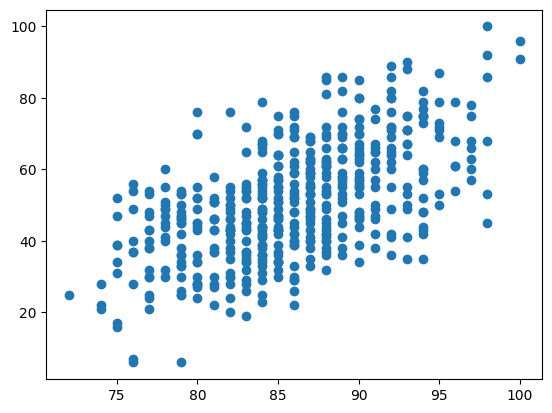

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df.rides, df.overall)
plt.show()

공분산(Covariance): 두 변수의 상관정도를 나타내는 값, 두 변수가 같은 방향으로 움직이는 정도
- x의 편차와 y의 편차를 곱한 값의 평균값
- X 증가 => y 증가 => 양수
- X 증가 => y 감소 => 음수
- 공분산이 0이면 두 변수는 선형관계가 없음

In [3]:
import numpy as np
np.cov(df.overall, df.rides)[0,1]

# 양수이므로 양의 상관관계임
# 공분산은 증가, 감소 방향을 이해할 수는 있으나 어느 정도의 상관관계인지 파악하기는 어려움


50.82939078156313

In [4]:
print(np.cov([1,2,3,4,5], [2,3,4,5,6])[0,1])  # x,y가 같은 방향으로 증가하므로 양수

print(np.cov([1,2,3,4,5], [3,3,3,3,3])[0,1])  # x의 변화에 y가 영향을 받지 않으므로 0

2.5
0.0


In [5]:
print(np.cov([1,2,3,4,5], [5,4,3,2,1])[0,1])  # x,y의 증가 방향이 다르므로 음수

print(np.cov([10,20,30,40,50], [5,4,3,2,1])[0,1])

# 공분산은 변수의 단위에 크게 영향을 받는 단점이 있음.
# 이것을 보완하기 위해 공분산을 표준화시킨 상관계수를 사용함

-2.5
-25.0


상관계수 :  X와 Y가 함께 변하는 정도 / X와 Y가 각각 변하는 정도
- 공분산을 표준편차의 곱으로 나눈 값(-1 ~ 1)
- +1 : 완벽한 양의 상관관계, -1 : 완벽한 음의 상관관계
- 0 : 선형관계가 없음

- 피어슨 상관계수: 일반적으로 사용되는 방법, 숫자형-숫자형 변수, 정규분포인 경우 정확한 결과를 얻을 수 있음, 이상치에 민감함
- 스피어만 상관계수: 서열척도의 경우 사용

- 직선관계가 아니어도 상관관계가 있으면 1에 가까운 값을 갖게 됨

- 상관분석은 선형관계를 설명할 수는 있으나 인과관계(원인과 결과)를 설명하기는 어려움
- 원인과 결과를 설명하려면 회귀분석을 사용해야 함

In [6]:
print(np.corrcoef([1,2,3,4,5], [5,4,3,2,1])[0,1])  
print(np.corrcoef([10,20,30,40,50], [5,4,3,2,1])[0,1])

-0.9999999999999999
-1.0


In [7]:
x = np.array([[169,70],[172,68],[175,78],[163,58],[180,80],[159,76],[158,52],[173,69],[180,75],[155,50],[187,90],[170,66]])
m = np.mean(x, axis=0)

In [8]:
print(x)
print(m)
cv = np.cov(x, rowvar=False) #공분산, # rowvar row가 variable이 아님, column variable
print(cv)

[[169  70]
 [172  68]
 [175  78]
 [163  58]
 [180  80]
 [159  76]
 [158  52]
 [173  69]
 [180  75]
 [155  50]
 [187  90]
 [170  66]]
[170.08333333  69.33333333]
[[ 96.99242424  96.15151515]
 [ 96.15151515 137.15151515]]


In [9]:
# 다변수 정규분포 랜덤 샘플

gan = np.random.multivariate_normal(m, cv, 5)
print(gan)

[[189.62881478  91.96101839]
 [175.97710827  66.0962963 ]
 [169.32081147  67.08585709]
 [169.79334276  60.48920958]
 [181.91825723  89.40200712]]


In [10]:
from tensorflow.keras.datasets import mnist

(x_tr, y_tr),(x_ts, y_ts) = mnist.load_data()    # 데이터셋 구성

x = x_tr[np.isin(y_tr, [7])]                # class 7 선택
print(x.shape)
print(x)

(6265, 28, 28)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [11]:
x = x.reshape((x.shape[0],28*28))
print(x.shape)
print(x)

(6265, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
m = np.mean(x, axis=0)                    
print(m.shape)
print(m)

(784,)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0

In [13]:
cv=np.cov(x, rowvar=False)
print(cv.shape)
print(cv)


(784, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
gan=np.random.multivariate_normal(m,cv,5)    
print(gan.shape)
print(gan)

(5, 784)
[[-3.18529694e-06 -1.28364439e-06 -5.35755216e-06 ...  4.06771661e-06
  -1.22642956e-06 -2.60286518e-07]
 [-6.09152040e-06  9.28656213e-07  5.17461606e-06 ... -8.52305116e-06
  -3.52037756e-07 -1.20886323e-06]
 [ 1.16420489e-06  3.65500549e-06  1.92458199e-06 ...  2.01301581e-07
  -6.74856876e-06 -9.76604103e-07]
 [-3.82825385e-07  2.45080396e-06 -4.71134355e-06 ...  4.31889449e-07
   7.56073379e-07 -1.36683379e-06]
 [-8.90771812e-06  2.11575727e-06 -1.04170288e-05 ...  1.79083772e-06
  -6.35153447e-06  2.28817741e-06]]


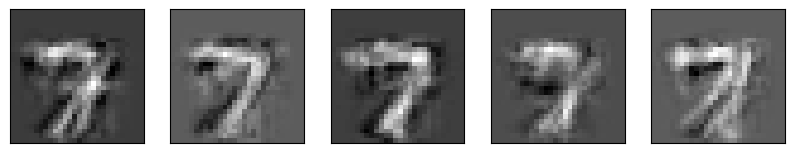

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))                
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(gan[i].reshape((28,28)),cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()    